## Credit Card Fraud Detection

### About Dataset
#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Reading File

Dataset is imported from Kaggle
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
ccdata = pd.read_csv('creditcard.csv')

In [3]:
ccdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
ccdata.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking for Null or missing values

In [6]:
ccdata.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
ccdata['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
ccdata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
ccdata.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [10]:
pd.options.display.max_columns = None

### Data Standardization of Amount

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
ccdata['Amount']=sc.fit_transform(pd.DataFrame(ccdata['Amount']))

In [13]:
ccdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
ccdata = ccdata.drop(['Time'],axis=1)

In [15]:
ccdata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Checking for duplicate Values

In [16]:
ccdata.duplicated().any()

True

In [17]:
ccdata.shape

(284807, 30)

In [117]:
#removing duplicate values
ccdata = ccdata.drop_duplicates()

In [19]:
ccdata.shape

(275663, 30)

In [20]:
duplicate_values = 284807-275663
duplicate_values

9144

In [21]:
ccdata['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

### EDA

In [22]:
import seaborn as sns

Text(0, 0.5, 'Count')

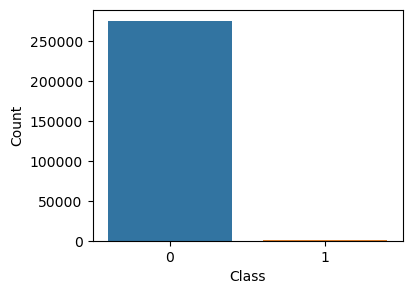

In [23]:
plt.figure(figsize=(4, 3))
sns.countplot(x=ccdata['Class'])
plt.xlabel("Class")
plt.ylabel("Count")

In [24]:
fraud=ccdata[ccdata['Class']==1]
normal=ccdata[ccdata['Class']==0]

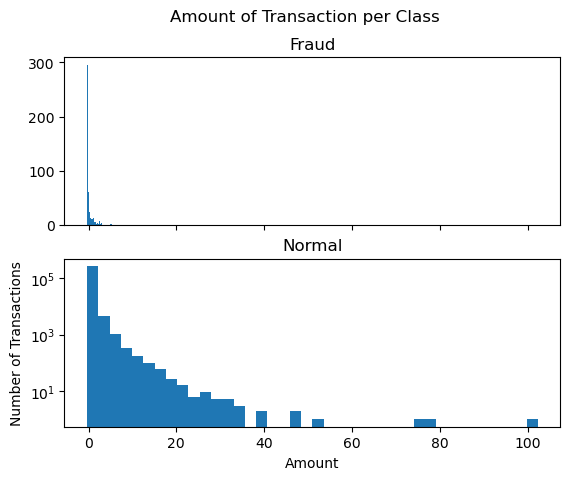

In [25]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount of Transaction per Class')
ax1.hist(fraud.Amount, bins=40)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=40)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

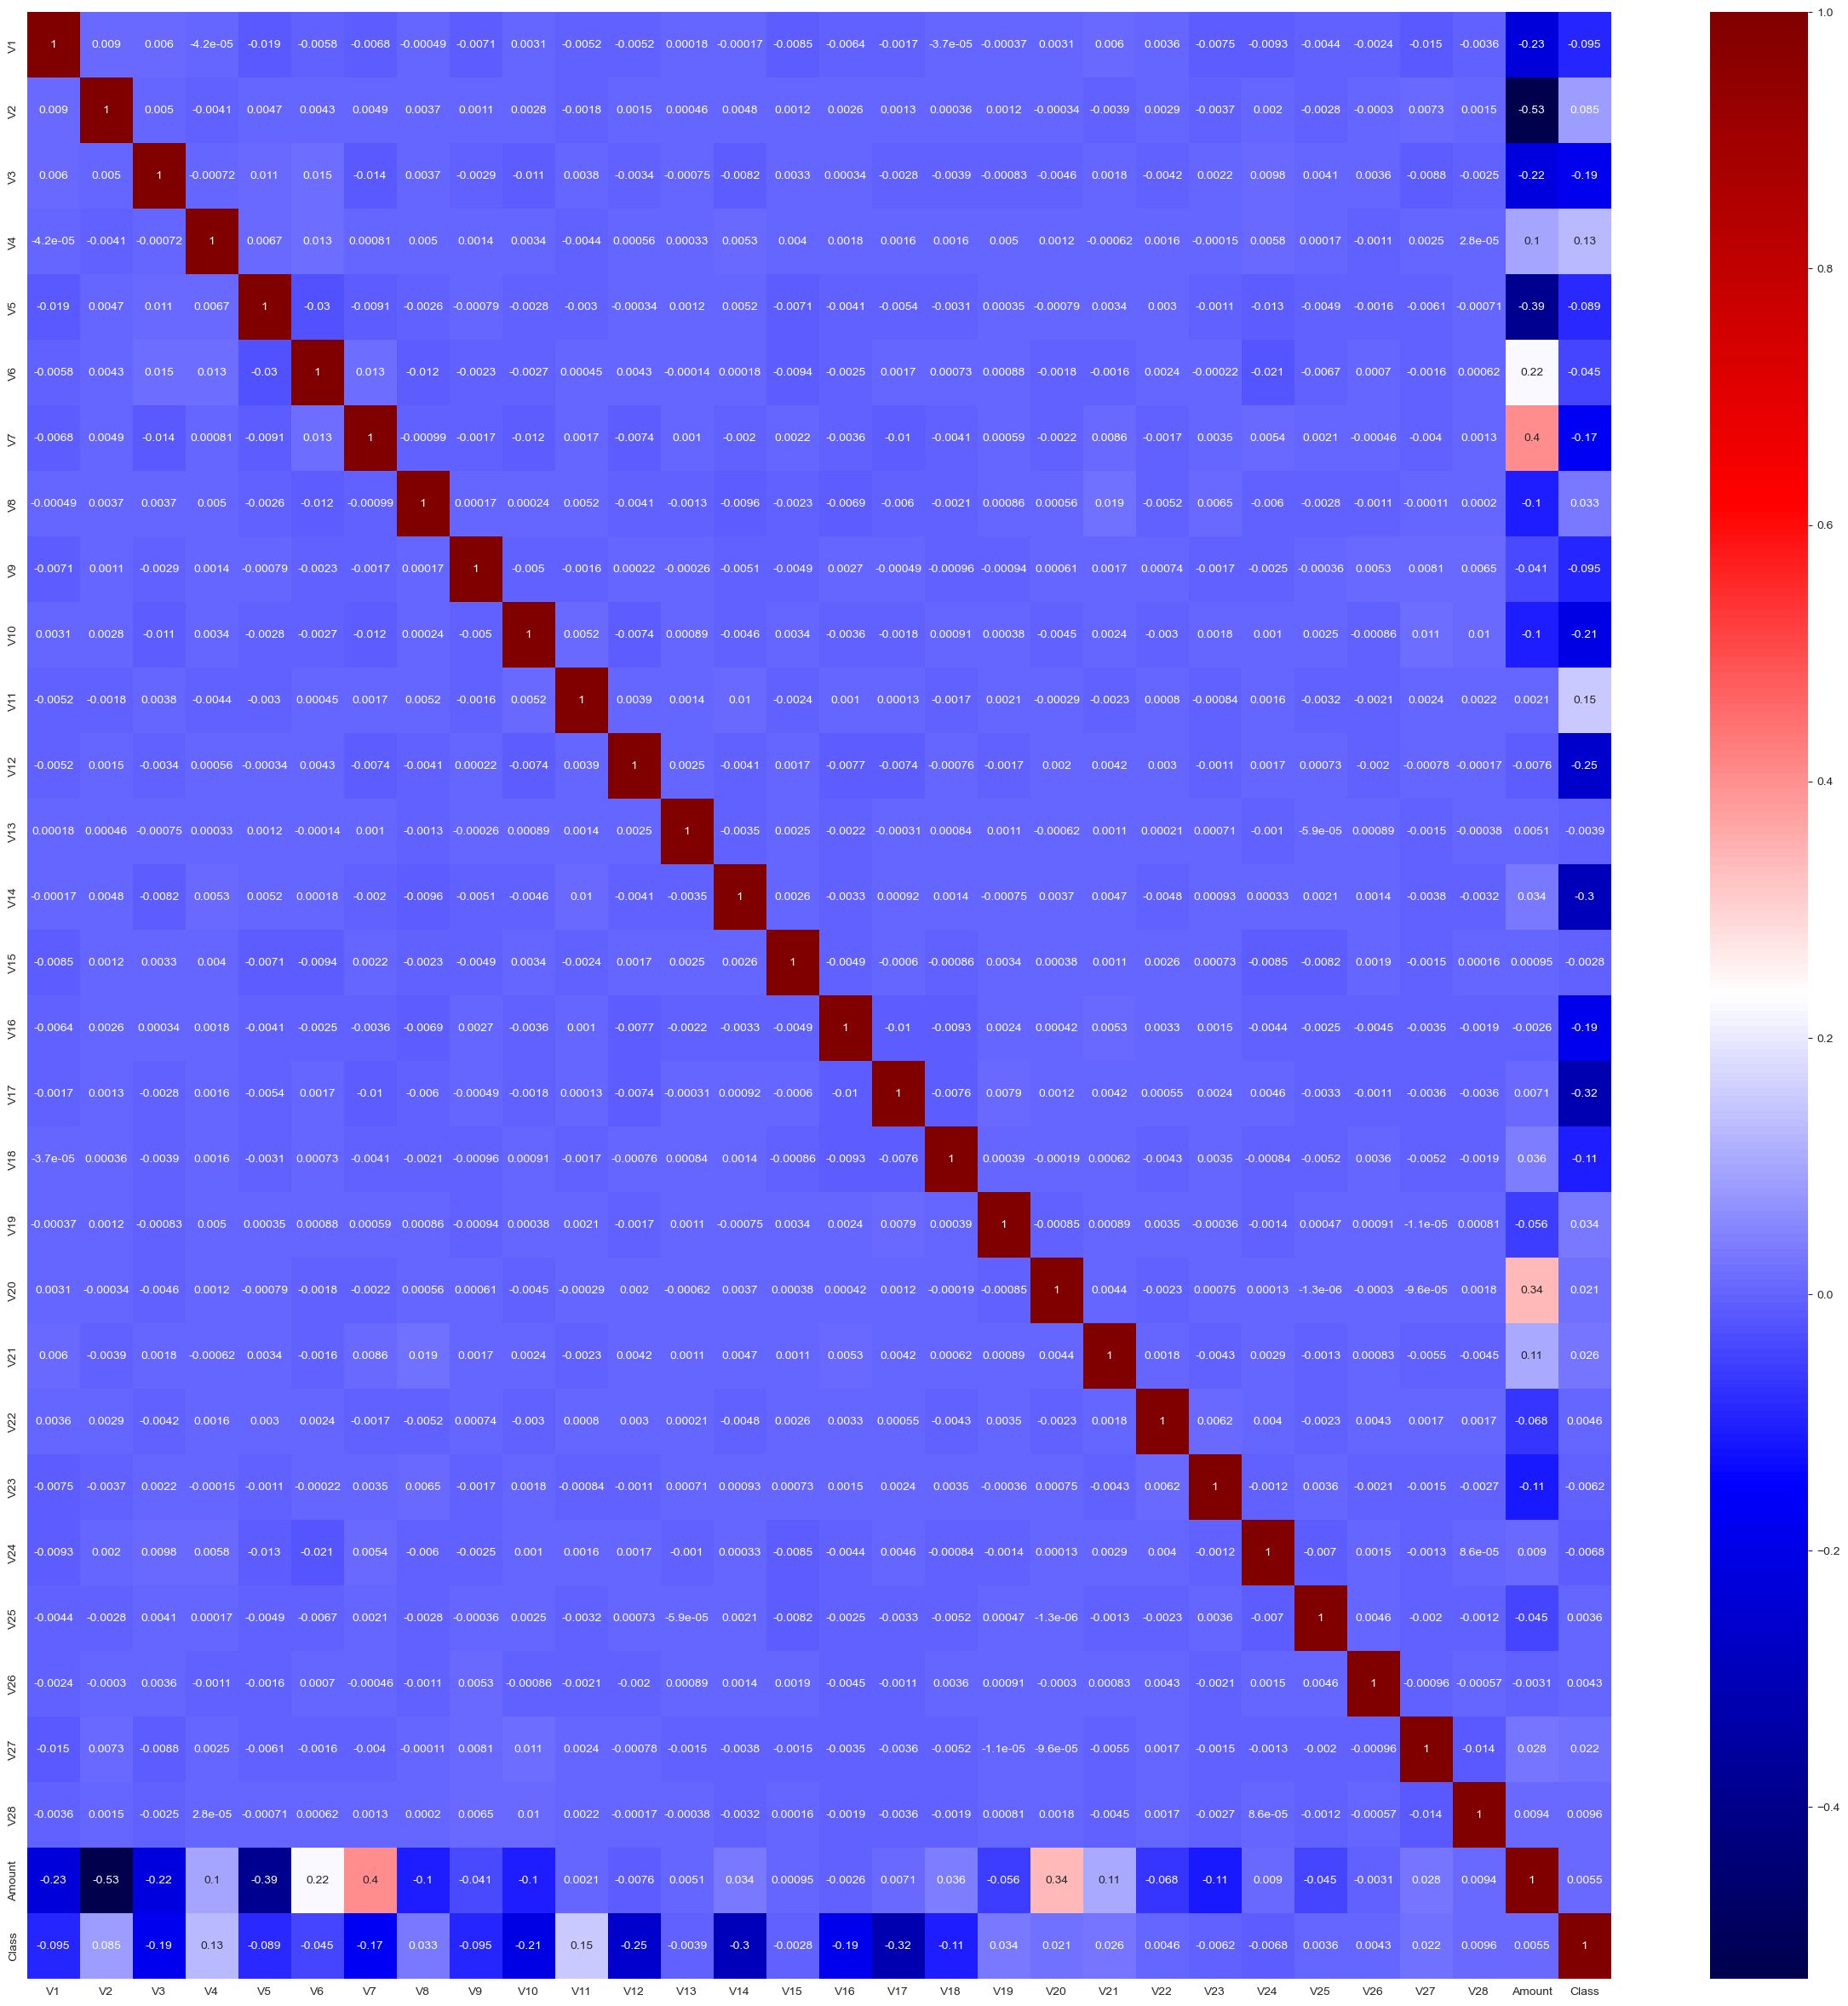

In [116]:
corr_match=ccdata.corr()
top_features=corr_match.index
plt.figure(figsize=(30,30))
g=sns.heatmap(ccdata[top_features].corr(),annot=True,cmap="seismic")

### Model Creation

In [27]:
X = ccdata.drop('Class',axis=1)
y = ccdata['Class']

### Logistic Regression

#### Logistic Regression:
Logistic Regression is a statistical method for predicting binary outcomes from data.
It’s used when the dependent variable is categorical and the outcome is either one thing or another, such as spam or not spam, win or lose, etc.
It estimates the probability that a given instance belongs to a particular class using the logistic function (also known as the sigmoid function), which outputs values between 0 and 1.

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred1 = log.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

#### Accuracy_score
The accuracy score is the ratio of the number of correct predictions to the total number of predictions made.

In [32]:
accuracy_score(y_test,y_pred1)

0.9992563437505668

In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score

#### Precision_score
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

In [34]:
precision_score(y_test,y_pred1)

0.890625

#### Recall_score
Recall (also known as sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class.

In [35]:
recall_score(y_test,y_pred1)

0.6263736263736264

#### F1_score
The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

In [36]:
f1_score(y_test,y_pred1)

0.7354838709677419

### Decision Tree Classifier

#### Decision Tree Classifier
A Decision Tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.
It’s used for both classification and regression tasks but is particularly good for classification.
Starting from the root, it makes sequential, hierarchical decisions about the outcome variable based on the input features2.

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred2 = dt.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred2)

0.9988573086898953

In [40]:
precision_score(y_test,y_pred2)

0.6428571428571429

In [41]:
recall_score(y_test,y_pred2)

0.6923076923076923

In [42]:
f1_score(y_test,y_pred2)

0.6666666666666666

### Random Forest Classifier

#### Random Forest Classifier
Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees.
It’s used for both classification and regression tasks and is particularly noted for its ability to handle large datasets with higher dimensionality.
It builds multiple decision trees and merges them together to get a more accurate and stable prediction

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred3 = rf.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred3)

0.9994739992382058

In [47]:
precision_score(y_test,y_pred3)

0.9305555555555556

In [48]:
recall_score(y_test,y_pred3)

0.7362637362637363

In [49]:
f1_score(y_test,y_pred3)

0.8220858895705522

In [50]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [51]:
final_data

,Models,ACC
0,LR,99.925634
1,DT,99.885731
2,RF,99.947400


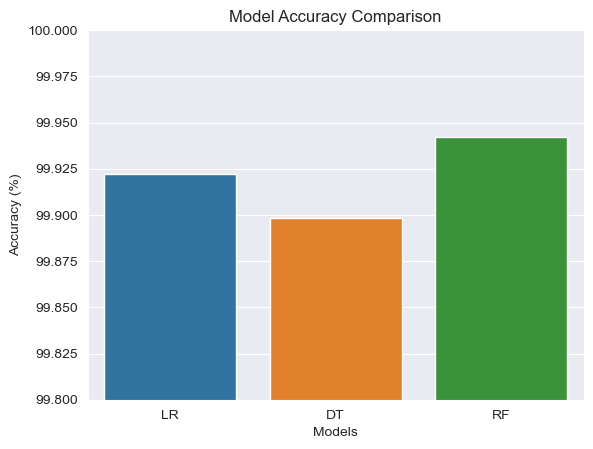

In [52]:
models = ["LR", "DT", "RF"]
accuracy = [99.922007, 99.898427, 99.941959]

# Create a bar plot
sns.set_style("darkgrid")
sns.barplot(x=models, y=accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(99.8, 100)  # Set y-axis limits for better visualization
plt.show()

### Undersampling

#### Undersampling
Undersampling involves reducing the size of the majority class by randomly removing samples. This is done to balance the class distribution and ensure that the minority class has a more significant influence on the model training process.
There are various undersampling methods, such as random undersampling, Near Miss, Tomek Links, and Cluster Centroids, each with its own strategy for selecting which instances to remove from the majority class.

In [53]:
normal = ccdata[ccdata['Class']==0]
fraud = ccdata[ccdata['Class']==1]

In [54]:
normal.shape

(275190, 30)

In [55]:
fraud.shape

(473, 30)

In [56]:
normal_sample=normal.sample(n=473)

In [57]:
normal_sample.shape

(473, 30)

In [58]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [59]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [60]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Undersampling Logistic Regression

In [62]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [63]:
uy_pred1 = log.predict(X_test)

In [64]:
accuracy_score(y_test,uy_pred1)

0.9315789473684211

In [65]:
precision_score(y_test,uy_pred1)

0.9587628865979382

In [66]:
recall_score(y_test,uy_pred1)

0.9117647058823529

In [67]:
f1_score(y_test,uy_pred1)

0.9346733668341709

### Undersampling Decision Tree Classifier

In [68]:
udt = DecisionTreeClassifier()
udt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
uy_pred2 = udt.predict(X_test)

In [70]:
accuracy_score(y_test,uy_pred2)

0.9210526315789473

In [71]:
precision_score(y_test,uy_pred2)

0.9393939393939394

In [72]:
recall_score(y_test,uy_pred2)

0.9117647058823529

In [73]:
f1_score(y_test,uy_pred2)

0.9253731343283582

### Undersampling Random Forest Classifier

In [74]:
urf = RandomForestClassifier()
urf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
uy_pred3 = urf.predict(X_test)

In [76]:
accuracy_score(y_test,uy_pred3)

0.9421052631578948

In [77]:
precision_score(y_test,uy_pred3)

0.989247311827957

In [78]:
recall_score(y_test,uy_pred3)

0.9019607843137255

In [79]:
f1_score(y_test,uy_pred3)

0.9435897435897436

In [80]:
ufinal_data = pd.DataFrame({'Models':['ULR','UDT','URF'],
              "UACC":[accuracy_score(y_test,uy_pred1)*100,
                     accuracy_score(y_test,uy_pred2)*100,
                     accuracy_score(y_test,uy_pred3)*100
                    ]})

In [81]:
ufinal_data

,Models,UACC
0,ULR,93.157895
1,UDT,92.105263
2,URF,94.210526


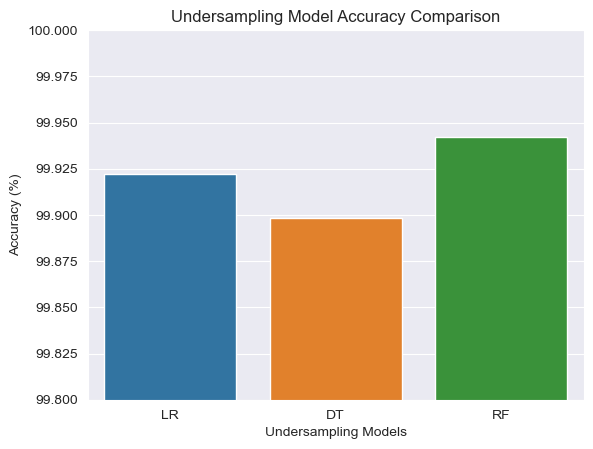

In [82]:
umodels = ["ULR", "UDT", "URF"]
uaccuracy = [94.7368, 92.1052, 95.2631]

# Create a bar plot
sns.set_style("darkgrid")
sns.barplot(x=models, y=accuracy)
plt.xlabel("Undersampling Models")
plt.ylabel("Accuracy (%)")
plt.title("Undersampling Model Accuracy Comparison")
plt.ylim(99.8, 100)  # Set y-axis limits for better visualization
plt.show()

### Oversampling

#### Oversampling
Oversampling, on the other hand, involves increasing the size of the minority class by adding more samples. This can be done by duplicating existing samples or generating new synthetic samples.
One popular oversampling technique is SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples by interpolating between existing minority class samples. Other methods include random oversampling and ADASYN (Adaptive Synthetic Sampling)

In [83]:
X = ccdata.drop('Class',axis=1)
y = ccdata['Class']

In [84]:
X.shape

(275663, 29)

In [85]:
y.shape

(275663,)

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [88]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### Oversampling Logistic Regression

In [90]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [91]:
oy_pred1 = log.predict(X_test)

In [92]:
accuracy_score(y_test,oy_pred1)

0.9449834659689669

In [93]:
precision_score(y_test,oy_pred1)

0.9731647429576784

In [94]:
recall_score(y_test,oy_pred1)

0.9151319018962603

In [95]:
f1_score(y_test,oy_pred1)

0.9432565635365328

### Oversampling Decision Tree Classifier

In [96]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
oy_pred2 = dt.predict(X_test)

In [98]:
accuracy_score(y_test,oy_pred2)

0.9984919510156619

In [99]:
precision_score(y_test,oy_pred2)

0.997604399194207

In [100]:
recall_score(y_test,oy_pred2)

0.9993818518989873

In [101]:
f1_score(y_test,oy_pred2)

0.9984923345200901

### Oversampling Random Forest Classifier

In [102]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
oy_pred3 = rf.predict(X_test)

In [104]:
accuracy_score(y_test,oy_pred3)

0.999918238308078

In [105]:
precision_score(y_test,oy_pred3)

0.9998363993310551

In [106]:
recall_score(y_test,oy_pred3)

1.0

In [107]:
f1_score(y_test,oy_pred3)

0.9999181929736854

In [109]:
ofinal_data = pd.DataFrame({'Models':['OLR','ODT','ORF'],
              "OACC":[accuracy_score(y_test,oy_pred1)*100,
                     accuracy_score(y_test,oy_pred2)*100,
                     accuracy_score(y_test,oy_pred3)*100
                    ]})

In [110]:
ofinal_data

,Models,OACC
0,OLR,94.498347
1,ODT,99.849195
2,ORF,99.991824


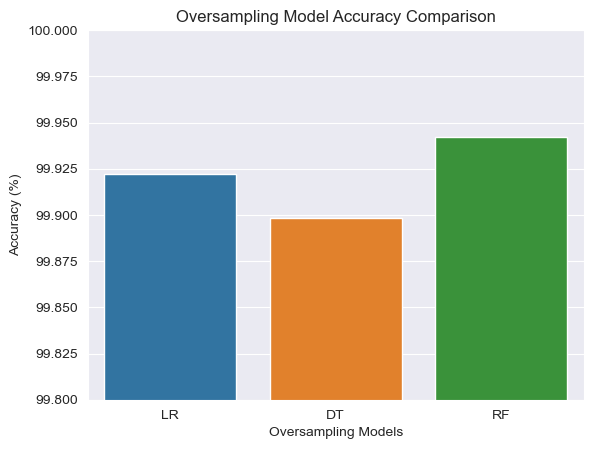

In [111]:
omodels = ["OLR", "ODT", "ORF"]
oaccuracy = [94.4983, 99.8491, 99.9918]

# Create a bar plot
sns.set_style("darkgrid")
sns.barplot(x=models, y=accuracy)
plt.xlabel("Oversampling Models")
plt.ylabel("Accuracy (%)")
plt.title("Oversampling Model Accuracy Comparison")
plt.ylim(99.8, 100)  # Set y-axis limits for better visualization
plt.show()